### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.constraints import MaxNorm

import sklearn
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('traincleaned.csv')

In [3]:
df.head()

0    1    2    3    4    5    6    7    8    9  loan_amount  \
0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0    -0.025077   
1  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0     0.122230   
2  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0     0.178347   
3  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0    -0.600277   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0    -0.824745   

   applicant_income  rate_spread  
0          0.042033            1  
1         -0.298088            2  
2         -0.375830            3  
3         -0.346677            6  
4         -0.259217            4

In [4]:
df.shape

(200000, 13)

### Data Analysis

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
df.corr()['loan_amount'].sort_values()

### Split dataset for training

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,12]

In [6]:
X.head()

0    1    2    3    4    5    6    7    8    9  loan_amount  \
0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0    -0.025077   
1  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0     0.122230   
2  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0     0.178347   
3  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0    -0.600277   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0    -0.824745   

   applicant_income  
0          0.042033  
1         -0.298088  
2         -0.375830  
3         -0.346677  
4         -0.259217

In [7]:
X.shape

(200000, 12)

In [8]:
y.head()

0    1
1    2
2    3
3    6
4    4
Name: rate_spread, dtype: int64

In [9]:
y.shape

(200000,)

In [10]:
X = X.values

In [11]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.02507689,  0.04203268],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.1222304 , -0.29808789],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.17834747, -0.37582973],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.53013048, -0.16203966],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.31471803, -0.16203966],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.92294993, -0.02599143]])

In [12]:
y = y.values

In [13]:
y

array([1, 2, 3, ..., 1, 1, 6], dtype=int64)

### Create Base Model as Reference

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
type(X_train)
type(X_test)

In [ ]:
type(y_train)
type(y_test)

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_shape=[12]))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['accuracy','mse'])

In [ ]:
model.summary()

In [ ]:
#model.fit(x=X_train,y=y_train,epochs=20)

### Using GridSearch to find best parameters

In [ ]:
epochs = [10,20]
params_grid = {'batch_size': [2, 4, 6]}
grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1,scoring='r2')

In [ ]:
grid_result = grid.fit(X,y)

In [ ]:
sklearn.metrics.SCORERS.keys()

### Using Full DNN

In [14]:
np.random.seed(0)
tf.random.set_seed(0)

In [15]:
model = Sequential()
model.add(Dense(30,activation='relu',input_shape=[12],kernel_constraint=MaxNorm(3)))
model.add(Dense(30,activation='relu',kernel_constraint=MaxNorm(3)))
model.add(Dense(1,activation='linear'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [18]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("BestModel.h5",save_best_only=True,monitor='mae')

In [19]:
model.fit(X,y,epochs=50,verbose=1)

Train on 200000 samples
Epoch 1/50
200000/200000 [==============================] - 10s 48us/sample - loss: 1.2029 - mae: 0.7516
Epoch 2/50
200000/200000 [==============================] - 9s 46us/sample - loss: 1.1283 - mae: 0.7319
Epoch 3/50
200000/200000 [==============================] - 10s 50us/sample - loss: 1.1221 - mae: 0.7301
Epoch 4/50
200000/200000 [==============================] - 11s 54us/sample - loss: 1.1184 - mae: 0.7291
Epoch 5/50
200000/200000 [==============================] - 10s 50us/sample - loss: 1.1154 - mae: 0.7283
Epoch 6/50
200000/200000 [==============================] - 10s 49us/sample - loss: 1.1140 - mae: 0.7277
Epoch 7/50
200000/200000 [==============================] - 11s 55us/sample - loss: 1.1116 - mae: 0.7274
Epoch 8/50
200000/200000 [==============================] - 10s 52us/sample - loss: 1.1102 - mae: 0.7267
Epoch 9/50
200000/200000 [==============================] - 8s 39us/sample - loss: 1.1098 - mae: 0.7264
Epoch 10/50
200000/200000 [======

In [20]:
model.history.history

{'loss': [1.2029424836170672,
  1.1282917348384858,
  1.1220841751646995,
  1.1183710382413865,
  1.1153644019126892,
  1.1140483386445046,
  1.1116355999207497,
  1.1102138986468315,
  1.109801798708439,
  1.1082689935660361,
  1.1082169466924667,
  1.1069526223373414,
  1.1055575880885125,
  1.105207379090786,
  1.1046783842754364,
  1.1046146392560006,
  1.1045941073203087,
  1.1029885951328278,
  1.1038539195013046,
  1.10255655875206,
  1.10222507635355,
  1.1022460071897506,
  1.1011931124544143,
  1.1021341871881485,
  1.1017117398643494,
  1.1000538410162926,
  1.0996283334875108,
  1.1005276932477952,
  1.100207887222767,
  1.0999353615188598,
  1.099245082528591,
  1.0995785939121245,
  1.0995314693427085,
  1.0990089471125604,
  1.099455116417408,
  1.0985638770389556,
  1.0992727894854546,
  1.0981688882160188,
  1.0976274784231186,
  1.0983402850580215,
  1.0987210265517235,
  1.09740203895092,
  1.0985253395223618,
  1.0977224434542656,
  1.0976589589381218,
  1.097504405

In [21]:
losses = pd.DataFrame(model.history.history)

In [22]:
losses

loss       mae
0   1.202942  0.751574
1   1.128292  0.731909
2   1.122084  0.730140
3   1.118371  0.729071
4   1.115364  0.728272
5   1.114048  0.727653
6   1.111636  0.727375
7   1.110214  0.726728
8   1.109802  0.726377
9   1.108269  0.725990
10  1.108217  0.726372
11  1.106953  0.725455
12  1.105558  0.725133
13  1.105207  0.725438
14  1.104678  0.724782
15  1.104615  0.724877
16  1.104594  0.725049
17  1.102989  0.724204
18  1.103854  0.724659
19  1.102557  0.724399
20  1.102225  0.723885
21  1.102246  0.724536
22  1.101193  0.723977
23  1.102134  0.724394
24  1.101712  0.724376
25  1.100054  0.723636
26  1.099628  0.723381
27  1.100528  0.723832
28  1.100208  0.723882
29  1.099935  0.724010
30  1.099245  0.723800
31  1.099579  0.723448
32  1.099531  0.723471
33  1.099009  0.723249
34  1.099455  0.723224
35  1.098564  0.723293
36  1.099273  0.723866
37  1.098169  0.723568
38  1.097627  0.723284
39  1.098340  0.723593
40  1.098721  0.723584
41  1.097402  0.723149
42  1.098525  0.723945
43  1.097722  0.723216
44  1.097659  0.723178
45  1.097504  0.723080
46  1.097752  0.723783
47  1.097668  0.723202
48  1.097689  0.723560
49  1.096643  0.723111

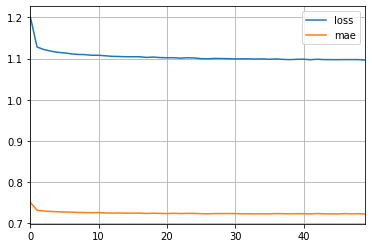

<Figure size 720x432 with 0 Axes>

In [23]:
losses.plot()
plt.grid()
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
#model.evaluate(X_test,y_test)

### Saving and Restoring Model

In [25]:
model.save('savedmodel.h5')

In [ ]:
del model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = tf.keras.models.load_model('savedmodel.h5')

In [ ]:
model.summary()

In [24]:
%pwd

'C:\\Users\\Dennis\\OneDrive\\Documents\\dev102xNov'

### Load Test Dataset

In [26]:
test = pd.read_csv('testmodified.csv')

In [27]:
test = test.values

In [28]:
y_pred = model.predict(test,verbose=1)

200000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [29]:
y_pred

array([[5.0679274],
       [1.6649872],
       [1.6284341],
       ...,
       [1.0552518],
       [1.2894449],
       [1.1935116]], dtype=float32)

### Model Evaluation

In [30]:
mean_absolute_error(y,y_pred)

1.3438653951883317

In [31]:
np.sqrt(mean_squared_error(y,y_pred))

1.981143513834881

In [32]:
explained_variance_score(y,y_pred)

-0.5458107997065014

In [33]:
r2_score(y,y_pred)

-0.5458119806074124

In [34]:
predresult = pd.DataFrame(y_pred)

In [35]:
predresult.to_csv('tensorflowresult.csv')

**Result is 0.5451**